In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
url = 'https://drive.google.com/file/d/1kM__riNHRPx5GsyuOH3yhiql3OZvwmuP/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
training_dataset = df.loc[df['season'] !=  20192020]
training_dataset

,event_Idx,period,periodTime,id_team_that_shot,name_team_that_shot,result_event,x_coord,y_coord,distance,angle,...,angle_change,speed,powerplay,team_that_shot_nb,other_team_nb,type_season,id_game,season,team_away_name,team_home_name
0,9,1,01:27,13,Florida Panthers,Shot,-35.0,31.0,63.134776,-0.513252,...,0.000000,4.590146,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
1,12,1,01:55,13,Florida Panthers,Goal,-78.0,5.0,13.000000,-0.394791,...,0.000000,0.712422,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
2,14,1,02:06,13,Florida Panthers,Shot,-83.0,-20.0,21.189620,1.234122,...,0.000000,7.761422,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
3,18,1,02:54,2,New York Islanders,Shot,48.0,25.0,48.877398,0.536911,...,0.000000,14.840822,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
4,19,1,02:59,13,Florida Panthers,Shot,-57.0,14.0,35.846897,-0.401229,...,-0.222013,21.114924,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,276,3,15:37,28,San Jose Sharks,Shot,67.0,-19.0,29.832868,-0.690446,...,0.000000,2.000918,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks
332738,281,3,16:33,21,Colorado Avalanche,Shot,-78.0,1.0,12.041595,-0.083141,...,0.000000,0.851661,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks
332739,291,3,18:39,21,Colorado Avalanche,Shot,-82.0,10.0,12.806248,-0.896055,...,0.000000,0.659472,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks
332740,292,3,18:40,21,Colorado Avalanche,Shot,-81.0,1.0,9.055385,-0.110657,...,0.785398,9.055385,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks


In [4]:
dataset = training_dataset.filter(['distance', 'angle', 'result_event', 'empty_net'])
dataset

,distance,angle,result_event,empty_net
0,63.134776,-0.513252,Shot,NaN
1,13.000000,-0.394791,Goal,False
2,21.189620,1.234122,Shot,NaN
3,48.877398,0.536911,Shot,NaN
4,35.846897,-0.401229,Shot,NaN
...,...,...,...,...
332737,29.832868,-0.690446,Shot,NaN
332738,12.041595,-0.083141,Shot,NaN
332739,12.806248,-0.896055,Shot,NaN
332740,9.055385,-0.110657,Shot,NaN


In [5]:
from numpy.core.multiarray import result_type
from pandas.core import resample
# Cleaning up the dataset 
dataset['empty_net'] = dataset['empty_net'].fillna(0) # replace all NaNs with 0
dataset['empty_net'] = dataset['empty_net'].astype(int) # assign 0 or 1 based on the boolean present

dataset.rename(columns={'result_event': 'isGoal'}, inplace=True)
dataset['isGoal'].loc[dataset['isGoal'] == 'Goal'] = 1
dataset['isGoal'].loc[dataset['isGoal'] == 'Shot'] = 0
dataset['isGoal'] = dataset['isGoal'].apply(pd.to_numeric)
dataset

,distance,angle,isGoal,empty_net
0,63.134776,-0.513252,0,0
1,13.000000,-0.394791,1,0
2,21.189620,1.234122,0,0
3,48.877398,0.536911,0,0
4,35.846897,-0.401229,0,0
...,...,...,...,...
332737,29.832868,-0.690446,0,0
332738,12.041595,-0.083141,0,0
332739,12.806248,-0.896055,0,0
332740,9.055385,-0.110657,0,0


In [29]:
dataset['angle'] = dataset['angle'].apply(lambda x : np.degrees(x))
dataset

,distance,angle,isGoal,empty_net
0,63.134776,-29.407189,0,0
1,13.000000,-22.619865,1,0
2,21.189620,70.709954,0,0
3,48.877398,30.762720,0,0
4,35.846897,-22.988717,0,0
...,...,...,...,...
332737,29.832868,-39.559668,0,0
332738,12.041595,-4.763642,0,0
332739,12.806248,-51.340192,0,0
332740,9.055385,-6.340192,0,0


In [6]:
# Information about our dataset
goals_count = dataset['isGoal'].loc[dataset['isGoal'] == 1].count()
shots_count = dataset['isGoal'].loc[dataset['isGoal'] == 0].count()
print("The number of goals in the training dataset:", goals_count)
print("The number of shots in the training dataset: ", shots_count)

The number of goals in the training dataset: 31095
The number of shots in the training dataset:  301647


## Question 1

* Binning by distance

In [16]:
'''
cop = dataset.copy()
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200] # bins for distance
cop['binned'] = pd.cut(cop['distance'], bins)
cop['Dist'] = cop['binned'].apply(lambda x: x.right)
cop.drop(['angle', 'distance', 'empty_net', 'binned'], inplace=True, axis=1)
cop
'''

"\ncop = dataset.copy()\nbins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200] # bins for distance\ncop['binned'] = pd.cut(cop['distance'], bins)\ncop['Dist'] = cop['binned'].apply(lambda x: x.right)\ncop.drop(['angle', 'distance', 'empty_net', 'binned'], inplace=True, axis=1)\ncop\n"

<AxesSubplot: xlabel='distance', ylabel='Count'>

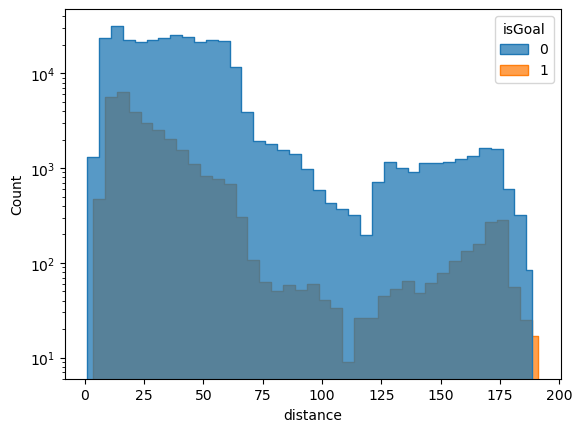

In [21]:
# Overall view 
sns.histplot(data= dataset, x= 'distance', hue="isGoal", multiple='dodge', element='step', stat='count', binwidth=5,log_scale=(False, True))


<AxesSubplot: xlabel='distance', ylabel='Count'>

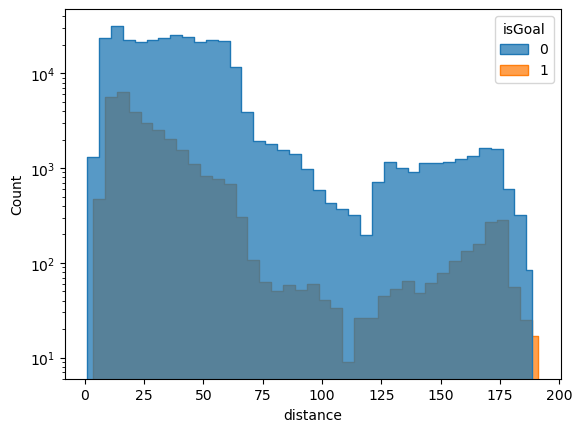

In [24]:
# Close view 
sns.histplot(data=dataset, x= "distance", hue="isGoal", multiple='dodge', element='step', stat='count',binwidth=5,log_scale=(False, True))


* Binning by angle

In [34]:
copAngle = dataset.copy()
copAngle['binned'] = pd.cut(copAngle['angle'], 20)
copAngle['Angle'] = copAngle['binned'].apply(lambda x: x.right)
copAngle.drop(['angle', 'distance', 'empty_net', 'binned'], inplace=True, axis=1)
copAngle

,isGoal,Angle
0,0,-27.0
1,1,-18.0
2,0,72.0
3,0,36.0
4,0,-18.0
...,...,...
332737,0,-36.0
332738,0,0.0
332739,0,-45.0
332740,0,0.0


<AxesSubplot: xlabel='Angle', ylabel='Count'>

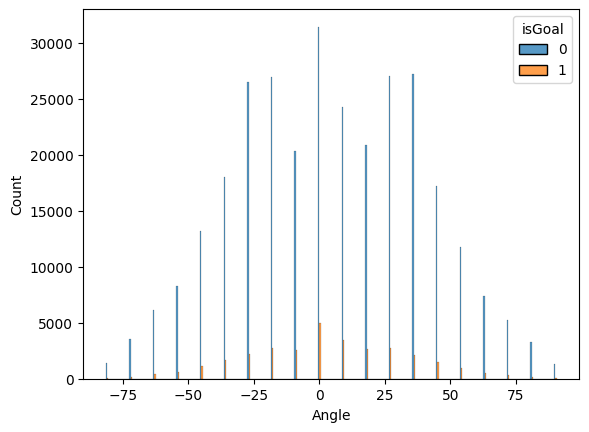

In [35]:
# General Overview
sns.histplot(data=copAngle, x= "Angle", hue="isGoal", multiple='dodge', element='bars')

(0.0, 30000.0)

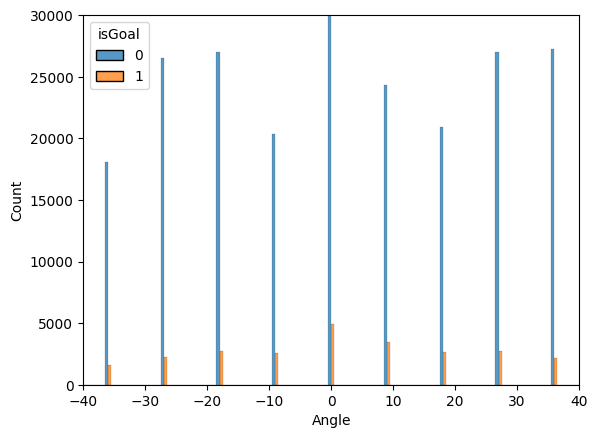

In [36]:
# Close view
sns.histplot(data=copAngle, x= "Angle", hue="isGoal", multiple='dodge', stat='count')
plt.xlim(-40,40)
plt.ylim(0,30000)

2D Histogram without goal separation

In [37]:
cop2D = dataset.copy()

cop2D['Dist'] = pd.cut(cop2D['distance'], 20).apply(lambda x : x.right)
cop2D['Angle'] = pd.cut(cop2D['angle'], 20).apply(lambda x: x.right)

cop2D.drop(['angle', 'distance', 'empty_net'], inplace=True, axis=1)
cop2D

,isGoal,Dist,Angle
0,0,67.376,-27.0
1,1,19.965,-18.0
2,0,29.447,72.0
3,0,57.894,36.0
4,0,38.929,-18.0
...,...,...,...
332737,0,38.929,-36.0
332738,0,19.965,0.0
332739,0,19.965,-45.0
332740,0,10.482,0.0


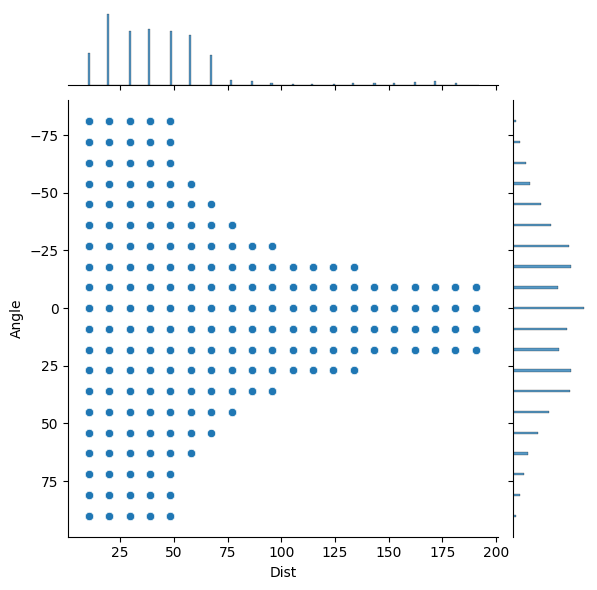

In [38]:
# Vue complète
sns.jointplot(data=cop2D, x="Dist", y="Angle")

(0.0, 100.0)

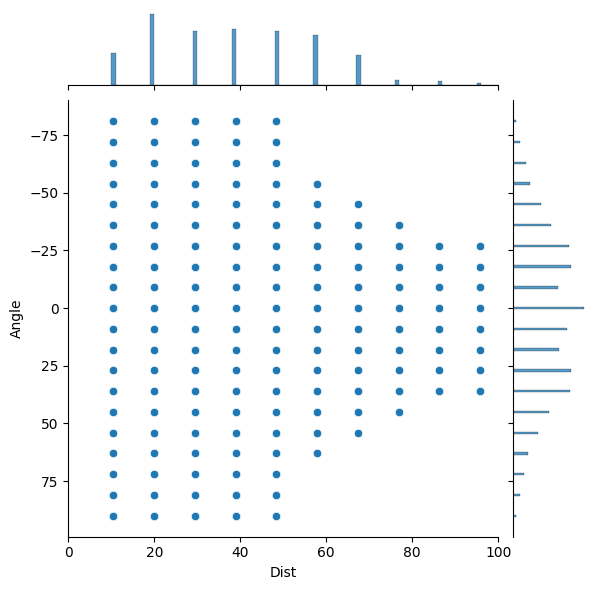

In [39]:
# Closer view 
sns.jointplot(data=cop2D, x="Dist", y="Angle")
plt.xlim(0, 100)

## Question 2

* Goal rate to the distance

In [40]:
goals = cop.loc[cop['isGoal'] == 1].groupby('Dist').size().reset_index(name='goals')
total_shots = cop.loc[cop['isGoal'] == 0].groupby('Dist').size().reset_index(name='total_shots')
total_shots.drop(['Dist'], inplace=True, axis=1)

goal_rate_distance = pd.concat([goals, total_shots], axis=1)
goal_rate_distance['goal_rate'] = ((goal_rate_distance['goals'] / (goal_rate_distance['total_shots'] + goal_rate_distance['goals']))*100).round(2)
goal_rate_distance.drop(['goals', 'total_shots'], inplace=True, axis=1)
goal_rate_distance



,Dist,goal_rate
0,20,17.29
1,40,9.26
2,60,3.73
3,80,2.65
4,100,4.29
5,120,6.38
6,140,5.40
7,160,7.22
8,180,12.97
9,200,8.79


Text(0.5, 1.0, 'Goal rate vs Distance')

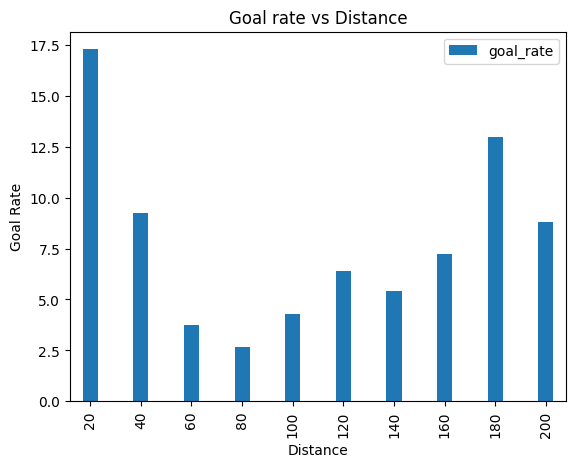

In [41]:
# Histogramme
goal_rate_distance.plot(kind='bar', x='Dist', y= 'goal_rate', width=0.3)
plt.xlabel("Distance")
plt.ylabel("Goal Rate")
plt.title("Goal rate vs Distance")

* Goal rate to the angle of the shot

In [42]:
goals = copAngle.loc[copAngle['isGoal'] == 1].groupby('Angle').size().reset_index(name='goals')
total_shots = copAngle.loc[copAngle['isGoal'] == 0].groupby('Angle').size().reset_index(name='total_shots')
total_shots.drop(['Angle'], inplace=True, axis=1)

goal_rate_angle = pd.concat([goals, total_shots], axis=1)
goal_rate_angle['goal_rate'] = ((goal_rate_angle['goals'] / goal_rate_angle['total_shots'])*100).round(2)
goal_rate_angle.drop(['goals', 'total_shots'], inplace=True, axis=1)
goal_rate_angle

,Angle,goal_rate
0,-81.0,7.52
1,-72.0,5.17
2,-63.0,6.27
3,-54.0,7.27
4,-45.0,8.68
5,-36.0,9.07
6,-27.0,8.44
7,-18.0,10.06
8,-9.0,12.67
9,0.0,15.71


Text(0.5, 1.0, 'Goal rate vs Angle')

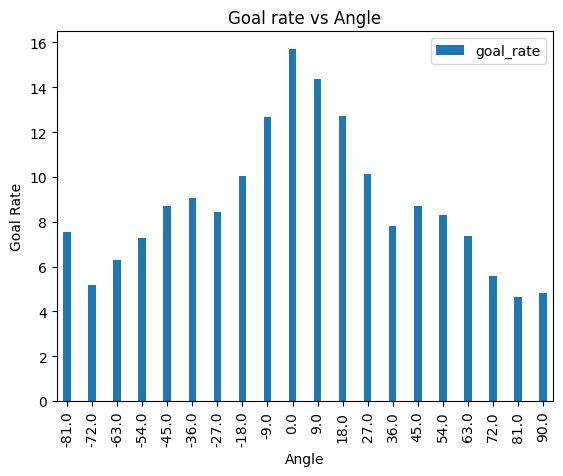

In [43]:
# Histogramme
goal_rate_angle.plot(kind='bar', x='Angle', y= 'goal_rate', width=0.3)
plt.xlabel("Angle")
plt.ylabel("Goal Rate")
plt.title("Goal rate vs Angle")

## Question 3

In [44]:
copyGoals = dataset.loc[dataset['isGoal'] == 1].filter(['distance', 'empty_net'])
copyGoals['Dist'] = pd.cut(copyGoals['distance'], 20).apply(lambda x : x.right)
copyGoals.drop('distance', inplace=True, axis=1)
copyGoals.groupby('Dist').size().reset_index(name='count')
copyGoals

,empty_net,Dist
1,0,19.766
7,0,29.150
17,0,19.766
21,0,19.766
29,0,19.766
...,...,...
332696,0,10.383
332706,0,10.383
332713,0,29.150
332732,0,29.150


<AxesSubplot: xlabel='Dist', ylabel='Count'>

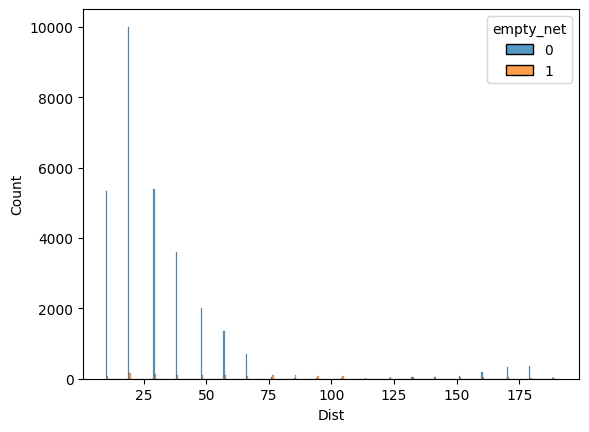

In [45]:
# General view
sns.histplot(data=copyGoals, x= "Dist", hue="empty_net", multiple='dodge', element='bars', dodge=False)

(0.0, 4000.0)

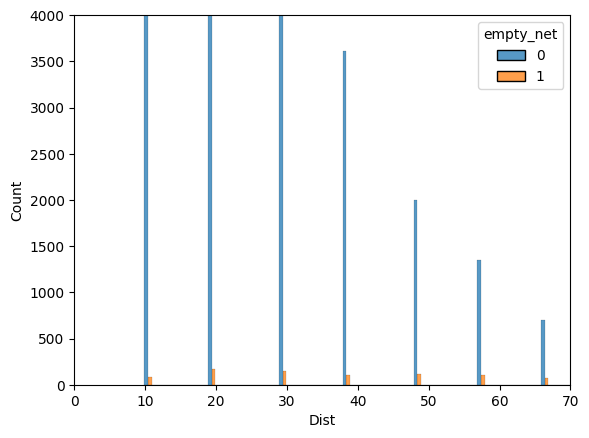

In [46]:
# Closer view
sns.histplot(data=copyGoals, x= "Dist", hue="empty_net", multiple='dodge', element='bars', dodge=False)
plt.xlim(0,70)
plt.ylim(0,4000)